In [1]:
import pandas as pd
import numpy as np

In [2]:
#classification data file
url="https://raw.githubusercontent.com/cctech-labs/challenges/master/2020/06/hiring/resources/data_science/challenge2_dataset.csv"

In [3]:

data=pd.read_csv(url,error_bad_lines=False)

In [4]:
#classification prediction file
url2="https://raw.githubusercontent.com/cctech-labs/challenges/master/2020/06/hiring/resources/data_science/challenge2_prediction.csv"

In [5]:
prediction=pd.read_csv(url2,error_bad_lines=False)

In [6]:
data.head()

,1,2,3,Target
0,0.60,0.31,13.0,False
1,0.74,0.33,21.0,False
2,0.54,0.19,NaN,True
3,0.46,NaN,9.0,False
4,0.77,0.15,15.0,True


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 4 columns):
1         1992 non-null float64
2         1992 non-null float64
3         1993 non-null float64
Target    1984 non-null object
dtypes: float64(3), object(1)
memory usage: 62.5+ KB


In [8]:
data.isnull().sum()

1          3
2          3
3          2
Target    11
dtype: int64

In [9]:
data["1"].describe()

count    1992.000000
mean        1.488800
std        22.145983
min         0.400000
25%         0.490000
50%         0.600000
75%         0.710000
max       600.000000
Name: 1, dtype: float64

In [10]:
#s.d*3+mean #outlier cutoff

In [11]:
22.14*3+1.48

67.9

In [12]:
#Upper fence = Q3 + (1.5 * IQR)
upper=0.71+(1.5*0.219)
print(upper)


1.0385


In [13]:
#Lower fence = Q1 – (1.5 * IQR).
lower=0.49-(1.5*0.219)
print(lower)

0.16149999999999998


In [14]:
0.71-0.49#IQR

0.21999999999999997

In [15]:
#data['1']=data['1'].apply(lambda x:np.NaN if (x>0.219)|(x<0.161) else x)


In [16]:
data["1"].isnull().sum()

3

In [17]:

data['1'].fillna(method="ffill",inplace=True)

In [18]:
data["1"].isnull().sum()

0

In [19]:
#data['1'].fillna(method="ffill",inplace=True)


In [20]:
data["1"].isnull().sum()

0

In [21]:
data["1"]=data["1"].replace(to_replace=np.NaN, value=0.60, inplace=False)

In [22]:
data["1"].isnull().sum()

0

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

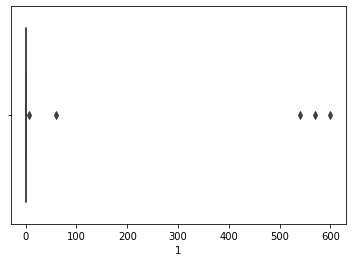

In [24]:
sns.boxplot(data["1"])

In [25]:
data["2"].describe()

count    1992.000000
mean        1.741546
std        58.456685
min         0.100000
25%         0.150000
50%         0.220000
75%         0.300000
max      2600.000000
Name: 2, dtype: float64

In [26]:

data['2'].fillna(method="ffill",inplace=True)

In [27]:
data["2"]=data["2"].replace(to_replace=np.NaN, value=0.22, inplace=False)

In [28]:
data["2"].isnull().sum()

0

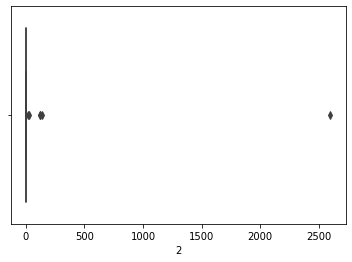

In [29]:
sns.boxplot(data["2"])

In [30]:
data["3"].describe()

count    1993.000000
mean       16.333166
std        42.407440
min         0.000000
25%        12.000000
50%        15.000000
75%        19.000000
max      1900.000000
Name: 3, dtype: float64

In [31]:

data['3'].fillna(method="ffill",inplace=True)

In [32]:
data["3"]=data["3"].replace(to_replace=np.NaN, value=15.0, inplace=False)

In [33]:
data["3"].isnull().sum()

0

In [34]:
data

,1,2,3,Target
0,0.60,0.31,13.0,False
1,0.74,0.33,21.0,False
2,0.54,0.19,21.0,True
3,0.46,0.19,9.0,False
4,0.77,0.15,15.0,True
...,...,...,...,...
1990,0.80,0.30,22.0,False
1991,0.69,0.22,9.0,True
1992,0.66,0.24,15.0,False
1993,0.46,0.26,11.0,False


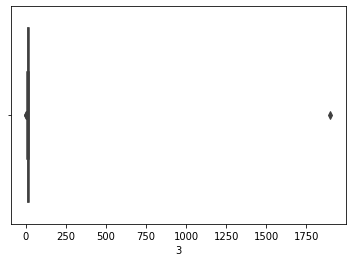

In [35]:
sns.boxplot(data["3"])

In [36]:
data["Target"].describe()

count      1984
unique        2
top       False
freq       1563
Name: Target, dtype: object

In [37]:
data["Target"].value_counts()

False    1563
True      421
Name: Target, dtype: int64

In [38]:
data["Target"]=data["Target"].replace(to_replace=np.NaN, value=False, inplace=False)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams["figure.figsize"]=12,9

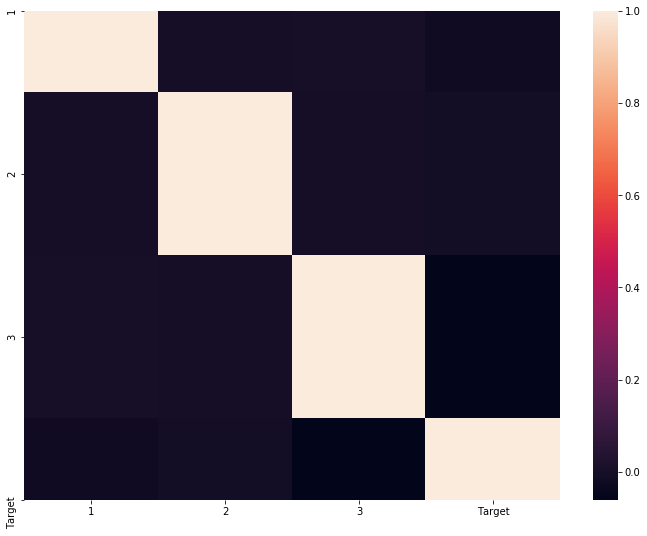

In [40]:
df=data.corr()
sns.heatmap(df)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [42]:
data.isnull().sum()

1         0
2         0
3         0
Target    0
dtype: int64

In [43]:
X = data.drop('Target',axis=1)
y = data.Target

In [44]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# LOGISTIC

In [45]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred_LR=lr.predict(X_test)

In [47]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

       False       0.88      0.95      0.91       481
        True       0.69      0.47      0.56       118

    accuracy                           0.85       599
   macro avg       0.78      0.71      0.73       599
weighted avg       0.84      0.85      0.84       599



In [48]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred_LR))

0.7070633214701012


In [49]:
MOdel = []
ROC_AUC_Accuracy = []
F1_Accuracy=[]
from sklearn.metrics import f1_score
Model = ['Logistic Regression']
ROC_AUC_Accuracy = [roc_auc_score(y_test,y_pred_LR)]
F1_Accuracy=[f1_score(y_test,y_pred_LR)]

accuracies = {}
acc = lr.score(X_test,y_test)*100
accuracies['Logistic'] = acc

In [50]:
ROC_AUC_Accuracy

[0.7070633214701012]

In [51]:
#Get predicted probabilites
target_probailities_log = lr.predict_proba(X_test)[:,1]

In [52]:
#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)

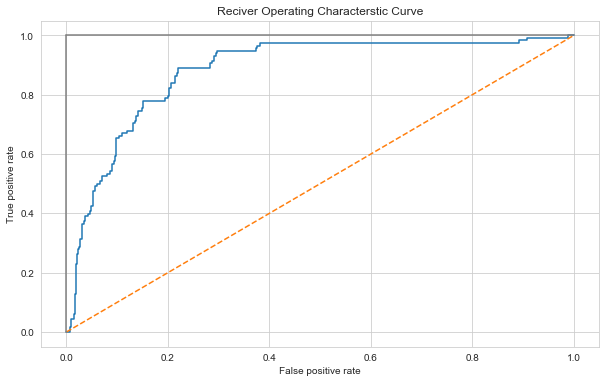

In [53]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,p=2)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)


In [55]:
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
print("knn with (k=3) accuracy is:" , knn.score(X_test,y_test))

knn with (k=3) accuracy is: 0.9732888146911519


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

       False       0.99      0.98      0.98       481
        True       0.92      0.95      0.93       118

    accuracy                           0.97       599
   macro avg       0.95      0.96      0.96       599
weighted avg       0.97      0.97      0.97       599



In [57]:
roc_auc_score(y_test,y_pred_knn)

0.9641812607914303

In [58]:
Model.append('k-Nearest-Neighbours')
ROC_AUC_Accuracy.append(roc_auc_score(y_test,y_pred_knn))
F1_Accuracy.append(f1_score(y_test,y_pred_knn))

In [59]:
Model, ROC_AUC_Accuracy,F1_Accuracy

acc = knn.score(X_test,y_test)*100
accuracies['KNN'] = acc

In [60]:
#Get predicted probabilites
target_probailities_log = knn.predict_proba(X_test)[:,1]

In [61]:
#Create true and false positive rates
knn_false_positive_rate,knn_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)

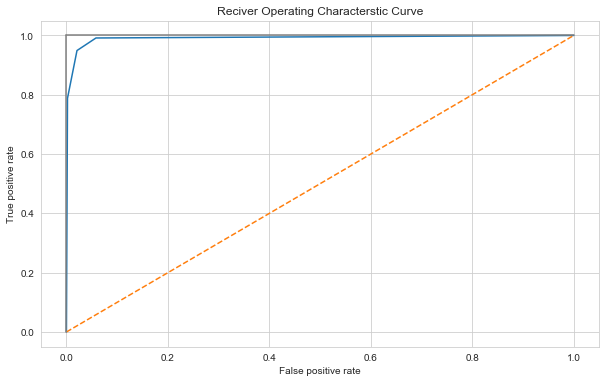

In [62]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(knn_false_positive_rate,knn_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# NAIVE BAYES

In [63]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

In [64]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

       False       0.99      0.42      0.59       481
        True       0.29      0.97      0.45       118

    accuracy                           0.53       599
   macro avg       0.64      0.70      0.52       599
weighted avg       0.85      0.53      0.57       599



In [65]:
roc_auc_score(y_test,y_pred_nb)

0.6993463476514323

In [66]:
Model.append('Naive Bayes')
ROC_AUC_Accuracy.append(roc_auc_score(y_test,y_pred_nb))
F1_Accuracy.append(f1_score(y_test,y_pred_nb))

Model, ROC_AUC_Accuracy,F1_Accuracy

acc = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc

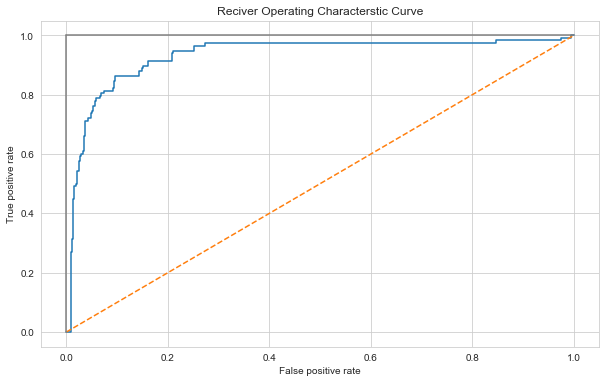

In [67]:
#Get predicted probabilites
target_probailities_log = nb.predict_proba(X_test)[:,1]
#Create true and false positive rates
nb_false_positive_rate,nb_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(nb_false_positive_rate,nb_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# DECISION TREE


In [68]:
from sklearn.tree import DecisionTreeClassifier

params = {
    
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,10,1),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

dt = DecisionTreeClassifier()

gs = GridSearchCV(estimator=dt,n_jobs=-1,cv=3,param_grid=params,scoring='recall')
gs.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'm

In [69]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 1,
 'max_features': 'auto',
 'max_leaf_nodes': 3,
 'splitter': 'best'}

In [70]:
dt = DecisionTreeClassifier(**gs.best_params_)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [71]:
roc_auc_score(y_test,y_pred_dt)

0.8347281440501779

In [72]:
Model.append('Decision Tree')
ROC_AUC_Accuracy.append(roc_auc_score(y_test,y_pred_dt))
F1_Accuracy.append(f1_score(y_test,y_pred_dt))
Model, ROC_AUC_Accuracy,F1_Accuracy

acc = dt.score(X_test,y_test)*100
accuracies['Decision tree'] = acc

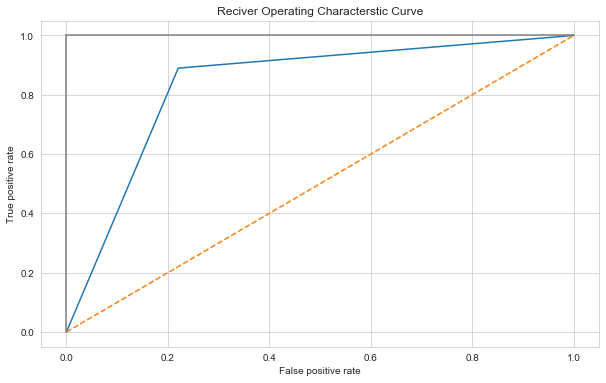

In [73]:
#Get predicted probabilites
target_probailities_log = dt.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_rate,tree_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [74]:
final_result = pd.DataFrame({'Model':Model,'Accuracy':ROC_AUC_Accuracy,"F1_score":F1_Accuracy})
final_result

,Model,Accuracy,F1_score
0,Logistic Regression,0.707063,0.555556
1,k-Nearest-Neighbours,0.964181,0.933333
2,Naive Bayes,0.699346,0.450980
3,Decision Tree,0.834728,0.638298


# RANDOM FOREST

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

       False       0.98      0.99      0.98       481
        True       0.95      0.92      0.94       118

    accuracy                           0.97       599
   macro avg       0.96      0.96      0.96       599
weighted avg       0.97      0.97      0.97       599

0.9749582637729549
[[475   6]
 [  9 109]]


In [76]:
acc = rfc.score(X_test,y_test)*100
accuracies['Random Forest'] = acc

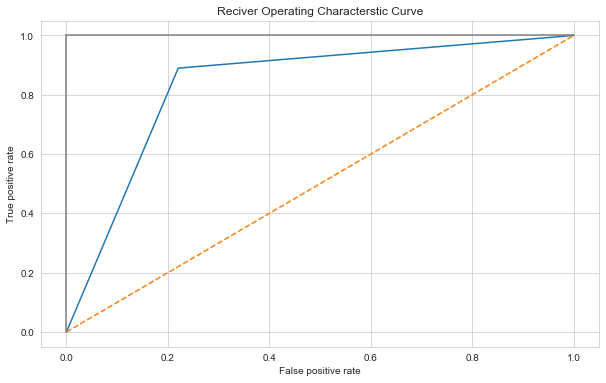

In [77]:
#Get predicted probabilites
target_probailities_log = dt.predict_proba(X_test)[:,1]
#Create true and false positive rates
rfc_false_positive_rate,rfc_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(rfc_false_positive_rate,rfc_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

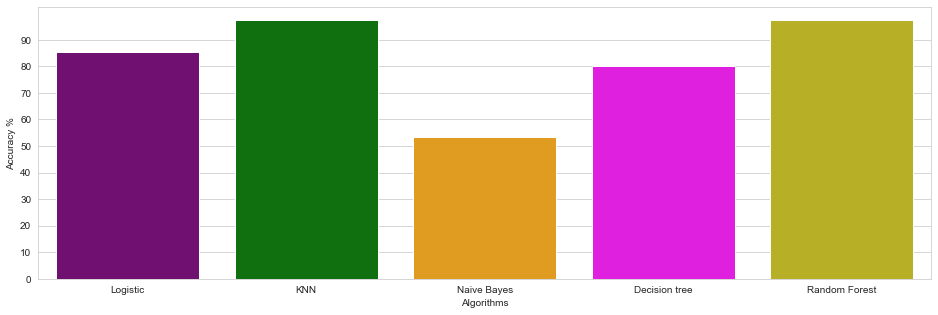

In [78]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Insight: KNN and Random Forest are giving the best result

In [79]:
Y_pred = rfc.predict(np.array(prediction))
a=pd.DataFrame(Y_pred)
print(a)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.